In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import time
start_time = time.time()
%run autoenc_br.py --epochs 2 --connected_components 2 --dataset 3dshapes --regularizer svd --bn_size 100
print("--- %s seconds ---" % (time.time() - start_time))

AttributeError: 'Trainer' object has no attribute 'train_loader'

--- 1.2357420921325684 seconds ---


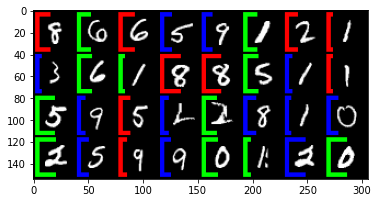

torch.Size([3, 36, 36])


In [3]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import torchvision
from col_mnist import ColMNIST
plt.rcParams["axes.grid"] = False

test_loader = torch.utils.data.DataLoader(
  ColMNIST('data/mnist', train=False, download=True,
                             transform=torchvision.transforms.Compose([#torchvision.transforms.Resize((224, 224)),
                               torchvision.transforms.ToTensor()
                             ])),
  batch_size=32, shuffle=True)

def imshow(img):
    #img = img / 2 + 0.5     # unnormalize
    npimg = img.cpu().numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

dataiter = iter(test_loader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
img_shape = images[0].shape
print(img_shape)

In [4]:
import matplotlib.pyplot as plt

def show_reconstruction(test_examples, reconstruction):
    with torch.no_grad():
        number = 10
        plt.figure(figsize=(20, 4))
        for index in range(number):
            # display original
            ax = plt.subplot(2, number, index + 1)
            plt.imshow(np.transpose(test_examples[index].cpu().numpy(), (1, 2, 0)))
            plt.gray()
            ax.get_xaxis().set_visible(False)
            ax.get_yaxis().set_visible(False)

            # display reconstruction
            ax = plt.subplot(2, number, index + 1 + number)
            plt.imshow(np.clip(np.transpose(reconstruction[index].numpy(), (1, 2, 0)), 0, 1))
            plt.gray()
            ax.get_xaxis().set_visible(False)
            ax.get_yaxis().set_visible(False)
        plt.show()

In [5]:
test_examples = None
for batch_features in trainer.test_loader:
    batch_features = batch_features[0]
    test_examples = batch_features.to(device)
    break
    
with torch.no_grad():
    reconstruction = trainer.model(test_examples).cpu()
show_reconstruction(test_examples, reconstruction)

NameError: name 'trainer' is not defined

In [ ]:
trainer.u.shape, trainer.s.shape, trainer.vh.shape

In [ ]:
trainer.s

In [ ]:
w = trainer.model.encoder_output_layer.weight.cpu().detach()
d1_inv_root = torch.diag(1/torch.sqrt(torch.abs(w).sum(1)))
d2_inv_root = torch.diag(1/torch.sqrt(torch.abs(w).sum(0)))

In [ ]:
ncc = 2

In [ ]:
u = trainer.u[:, :ncc].detach().cpu().numpy().transpose(1, 0)
plt.figure(figsize=(20, 20))
plt.imshow(u, cmap="magma")

In [ ]:
evec1 = torch.matmul(d1_inv_root.cuda(), trainer.u.cuda())
plt.figure(figsize=(20, 20))
plt.imshow(evec1.detach().cpu(), cmap="magma")

In [ ]:
plt.figure(figsize=(20, 20)) 
plt.imshow(u[1:]>0)
plt.figure(figsize=(20, 20)) 
plt.imshow(u[1:, np.argsort(u[ncc-1])]>0)
plt.figure(figsize=(20, 20)) 
plt.plot(u[1:, np.argsort(u[ncc-1])].transpose(1, 0))
print((u[1:]>0).sum(axis=0))

In [ ]:
v = trainer.vh.detach().cpu().numpy().transpose(1, 0)[:ncc]
plt.figure(figsize=(20, 20))
plt.imshow(v, cmap="magma")

In [ ]:
plt.figure(figsize=(20, 20)) 
plt.imshow(v[1:]>0)
plt.figure(figsize=(20, 20)) 
plt.imshow(v[1:, np.argsort(v[ncc-1])]>0)
plt.figure(figsize=(20, 20)) 
plt.plot(v[1:, np.argsort(v[ncc-1])].transpose(1, 0))
print((v[1:]>0).sum(axis=0))

In [ ]:
d1_inv_root = torch.diag(1/torch.sqrt(torch.abs(w).sum(1))).numpy()
d2_inv_root = torch.diag(1/torch.sqrt(torch.abs(w).sum(0))).numpy()
print(d2_inv_root.shape, v.shape)
evec = np.vstack([np.matmul(d1_inv_root, u.transpose(1, 0)), np.matmul(d2_inv_root, v.transpose(1, 0))]).transpose(1, 0)

In [ ]:
plt.figure(figsize=(20, 20))
plt.imshow(evec, cmap="magma")

In [ ]:
plt.figure(figsize=(20, 20)) 
plt.imshow(evec[1:]>0)
plt.figure(figsize=(20, 20)) 
plt.imshow(evec[1:, np.argsort(evec[ncc-1])]>0)
plt.figure(figsize=(20, 20)) 
plt.plot(evec[1:, np.argsort(evec[ncc-1])].transpose(1, 0))
print((evec[1:]>0).sum(axis=0))

In [ ]:
plt.figure(figsize=(20, 20)) 
plt.imshow(u[1:]>0)
plt.figure(figsize=(20, 20))
plt.imshow(u[1:, np.argsort(u[ncc-1])]>np.expand_dims(np.mean(u[1:], axis=1), axis=1))
plt.figure(figsize=(20, 20)) 
plt.plot(u[1:, np.argsort(u[ncc-1])].transpose(1, 0))
print((u[1:]>0).sum(axis=0))

In [ ]:
uset = []
blocks = []
for x in (u>0).transpose(1, 0):
    if str(x) not in uset:
        uset.append(str(x))
    
    blocks.append(uset.index(str(x)))
blocks = np.array(blocks)


In [ ]:
import matplotlib.pyplot as plt

def show_reconstruction(test_examples, reconstruction):
    with torch.no_grad():
        number = 10
        plt.figure(figsize=(20, 4))
        for index in range(number):
            # display original
            ax = plt.subplot(2, number, index + 1)
            plt.imshow(np.transpose(test_examples[index].cpu().numpy(), (1, 2, 0)))
            plt.gray()
            ax.get_xaxis().set_visible(False)
            ax.get_yaxis().set_visible(False)

            # display reconstruction
            ax = plt.subplot(2, number, index + 1 + number)
            plt.imshow(np.clip(np.transpose(reconstruction[index].numpy(), (1, 2, 0)), 0, 1))
            plt.gray()
            ax.get_xaxis().set_visible(False)
            ax.get_yaxis().set_visible(False)
        plt.show()


In [ ]:
for c in range(ncc):
    mask = torch.zeros(w.shape)
    mask.shape
    mask[blocks==c] = 1
    plt.figure(figsize=(20, 20)) 
    plt.imshow(mask[:, :1].transpose(1, 0), cmap='magma')
    trainer.model.set_mask(mask)
    
    with torch.no_grad():
        reconstruction = trainer.model(test_examples).cpu()
    show_reconstruction(test_examples, reconstruction)

In [ ]:
srt_enc = np.argsort(v.transpose(1, 0)[:, 1]).tolist()
srt_hidden = np.argsort(u.transpose(1, 0)[:, 1]).tolist()

trainer.model.set_mask(None)

w1 = trainer.model.encoder_output_layer.weight.cpu().detach()
w1 = w1[:, srt_enc]
w1 = w1[srt_hidden, :]


In [ ]:
srt_enc

In [ ]:
plt.figure(figsize=(20, 20)) 
plt.imshow((w1).cpu().numpy(), cmap='magma')

In [ ]:
binned_examples = [[[] for _ in range(3)] for _ in range(10)]
for batch_features in trainer.test_loader:
    batch_features, (digit, _, clr) = batch_features
    for i in range(len(batch_features)):
        binned_examples[digit[i].item()][clr[i].item()].append(batch_features[i].to(device))

In [ ]:
for d in range(10):
    for clr in range(3):
        binned_examples[d][clr] = torch.stack(binned_examples[d][clr]).to(device)
        print(binned_examples[d][clr].shape)

In [ ]:
losses = []
for _ in range(ncc):
    losses.append(torch.zeros((3, 10)))
    
for c in range(ncc):
    mask = torch.zeros(w.shape)
    mask.shape
    mask[blocks==c] = 1
    plt.figure(figsize=(20, 20)) 
    plt.imshow(mask[:, :1].transpose(1, 0), cmap='magma')
    trainer.model.set_mask(mask)
    
    for clr in range(3):
        for d in range(10):
            with torch.no_grad():
                reconstruction = trainer.model(binned_examples[d][clr]).cpu()
            show_reconstruction(binned_examples[d][clr], reconstruction)
            losses[c][clr][d] = trainer.criterion(binned_examples[d][clr], reconstruction.cuda())

In [ ]:

for c in range(ncc):
    plt.grid(False)
    plt.imshow(losses[c], cmap="magma")
    plt.show()
    print(losses[c])

           

In [ ]:
losses[0].sum(0)

# T-SNE

In [ ]:
import time
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

In [ ]:
# Utility function to visualize the outputs of PCA and t-SNE
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
%matplotlib inline

import seaborn as sns
sns.set_style('darkgrid')
sns.set_palette('muted')
sns.set_context("notebook", font_scale=1.5,
                rc={"lines.linewidth": 2.5})
RS = 123

def fashion_scatter(x, colors):
    # choose a color palette with seaborn.
    num_classes = len(np.unique(colors))
    palette = np.array(sns.color_palette("hls", num_classes))

    # create a scatter plot.
    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40, c=palette[colors.astype(np.int)])
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    ax.axis('off')
    ax.axis('tight')

    # add the labels for each digit corresponding to the label
    txts = []

    for i in range(num_classes):

        # Position of each label at median of data points.

        xtext, ytext = np.median(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=24)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
        txts.append(txt)

    return f, ax, sc, txts

In [ ]:
trainer.model.set_mask(None)

embeddings = []
targets = []
d_targets = []
c_targets = []
for batch_features, (digit, _, clr) in trainer.test_loader:
    with torch.no_grad():
        reconstruction = trainer.model(batch_features).cpu()
        embeddings.append(trainer.model.embedding)
        d_targets.extend(digit.tolist())
        c_targets.extend(clr.tolist())
        #targets.extend([str(d)+"_"+str(c) for d, c in zip(digit.tolist(), clr.tolist())])

In [ ]:
df_emb = torch.vstack(embeddings).detach().cpu().numpy()
targets = [c*10+d for d, c in zip(d_targets, c_targets)]

In [ ]:
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(df_emb)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

In [ ]:
fashion_scatter(tsne_results, np.array(targets))


In [ ]:
fashion_scatter(tsne_results, np.array(c_targets))

In [ ]:
fashion_scatter(tsne_results, np.array(d_targets))

In [ ]:
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results_block0 = tsne.fit_transform(df_emb[:, blocks==0])
tsne_results_block1 = tsne.fit_transform(df_emb[:, blocks==1])
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

In [ ]:
fashion_scatter(tsne_results_block0, np.array(c_targets))

In [ ]:
fashion_scatter(tsne_results_block0, np.array(d_targets))

In [ ]:
fashion_scatter(tsne_results_block1, np.array(c_targets))

In [ ]:
fashion_scatter(tsne_results_block1, np.array(targets))

# Collect activations

In [ ]:
from explainn_code.grab_functions import db_from_dat_with_labels, write_pic_as_sets

activations = []
test_data = []
for batch_features, (digit, _, clr) in trainer.test_loader:
    with torch.no_grad():
        reconstruction = trainer.model(batch_features).cpu()
        activations.append(trainer.model.layer_0_out.detach().cpu().numpy())
        test_data.append(batch_features.detach().cpu().numpy())
activations = np.concatenate(activations)


In [ ]:
for i in range(6):
    write_pic_as_sets(activations[:, i, :].reshape(activations.shape[0], -1), "filters_{}.dat".format(i))

In [ ]:
test_data = np.concatenate(test_data)
write_pic_as_sets(test_data.reshape(test_data.shape[0], -1), "test_data.dat")

In [ ]:
for i in range(6):
    db_from_dat_with_labels("filters_{}.dat".format(i), "test_data.dat", "data{}.db".format(i))